In [64]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (20, 8)
matplotlib.rcParams['xtick.labelsize']= 22
matplotlib.rcParams['ytick.labelsize']= 22
matplotlib.rcParams['axes.labelsize']= 22
matplotlib.rcParams.update({'font.size': 22})

import sys
sys.path.insert(0,"/home/albert/lib/python")
import numpy as np
import xarray as xr
import GriddedData
import time
import numpy.ma as ma


In [65]:
ds_hgradT_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JFM_hgradT_filt10km_bin1x1.nc')
ds_hgradS_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JFM_hgradS_filt10km_bin1x1.nc')
ds_hgradb_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JFM_hgradb_filt10km_bin1x1.nc')


In [66]:
ds_hgradT_JAS=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JAS_hgradT_filt10km_bin1x1.nc')
ds_hgradS_JAS=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JAS_hgradS_filt10km_bin1x1.nc')
ds_hgradb_JAS=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_JAS_hgradb_filt10km_bin1x1.nc')


In [67]:
hgradT_JFM=ds_hgradT_JFM['vohgradb']
hgradS_JFM=ds_hgradS_JFM['vohgradb']
hgradb_JFM=ds_hgradb_JFM['vohgradb']


In [68]:
hgradT_JAS=ds_hgradT_JAS['vohgradb']
hgradS_JAS=ds_hgradS_JAS['vohgradb']
hgradb_JAS=ds_hgradb_JAS['vohgradb']


In [69]:
def add_map(lon_min=-180, lon_max=180, lat_min=-90, lat_max=90,
            central_longitude=0., scale='auto', ax=None):
    """
    Add the map to the existing plot using cartopy

    Parameters
    ----------
    lon_min : float, optional
        Western boundary, default is -180
    lon_max : float, optional
        Eastern boundary, default is 180
    lat_min : float, optional
        Southern boundary, default is -90
    lat_max : float, optional
        Northern boundary, default is 90
    central_longitude : float, optional
        Central longitude, default is 180
    scale : {‘auto’, ‘coarse’, ‘low’, ‘intermediate’, ‘high, ‘full’}, optional
        The map scale, default is 'auto'
    ax : GeoAxes, optional
        A new GeoAxes will be created if None

    Returns
    -------
    ax : GeoAxes
    Return the current GeoAxes instance
    """
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    extent = (lon_min, lon_max, lat_min, lat_max)
    if ax is None:
        ax = plt.subplot(1, 1, 1,
                         projection=ccrs.PlateCarree(
	                                       central_longitude=central_longitude))
    ax.set_extent(extent)
    land = cfeature.GSHHSFeature(scale=scale,
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

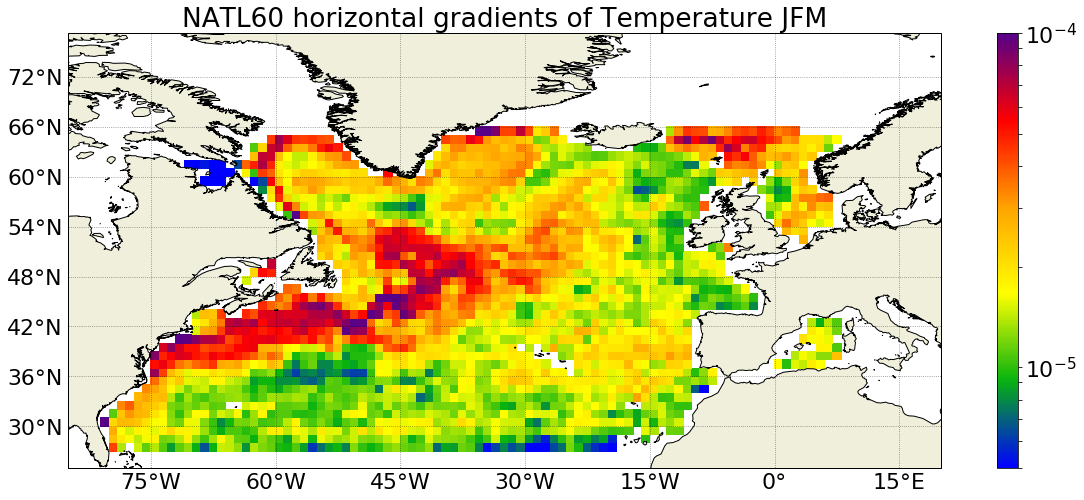

In [70]:
data=ma.masked_invalid(ds_hgradT_JFM['vohgradb'])
lon=ds_hgradT_JFM['nav_lon']
lat=ds_hgradT_JFM['nav_lat']
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-6, vmax=1e-4)

plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
plt.colorbar()
plt.title('NATL60 horizontal gradients of Temperature JFM')
plt.savefig('NATL60_TSG_T_gradients_JFM_1x1_log.png', dpi=300, bbox_inches='tight')

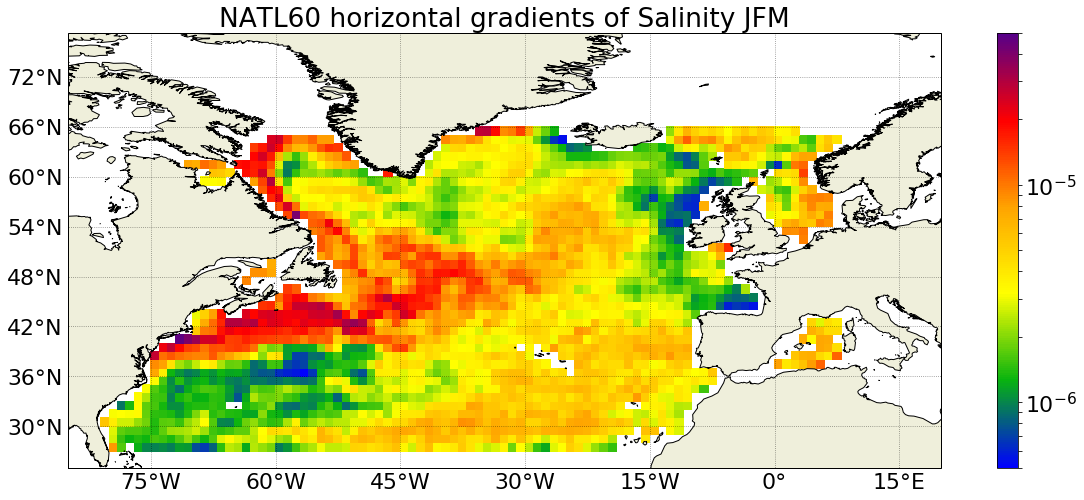

In [71]:
data=ma.masked_invalid(ds_hgradS_JFM['vohgradb'])
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-7, vmax=5e-5)

plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
plt.colorbar()
plt.title('NATL60 horizontal gradients of Salinity JFM')
plt.savefig('NATL60_TSG_S_gradients_JFM_1x1_log.png', dpi=300, bbox_inches='tight')

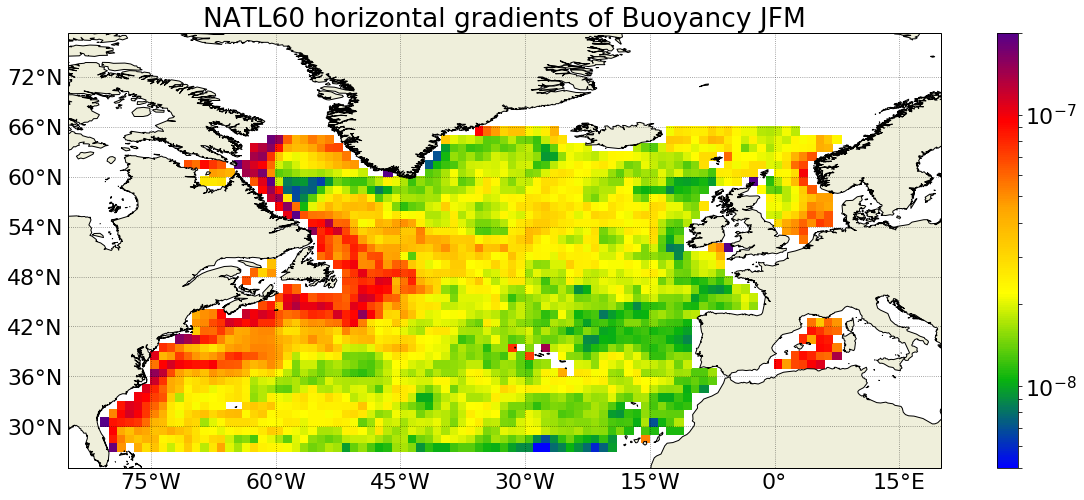

In [72]:
data=ma.masked_invalid(ds_hgradb_JFM['vohgradb'])
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-9, vmax=2e-7)

plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
plt.colorbar()
plt.title('NATL60 horizontal gradients of Buoyancy JFM')
plt.savefig('NATL60_TSG_buoy_gradients_JFM_1x1_log.png', dpi=300, bbox_inches='tight')

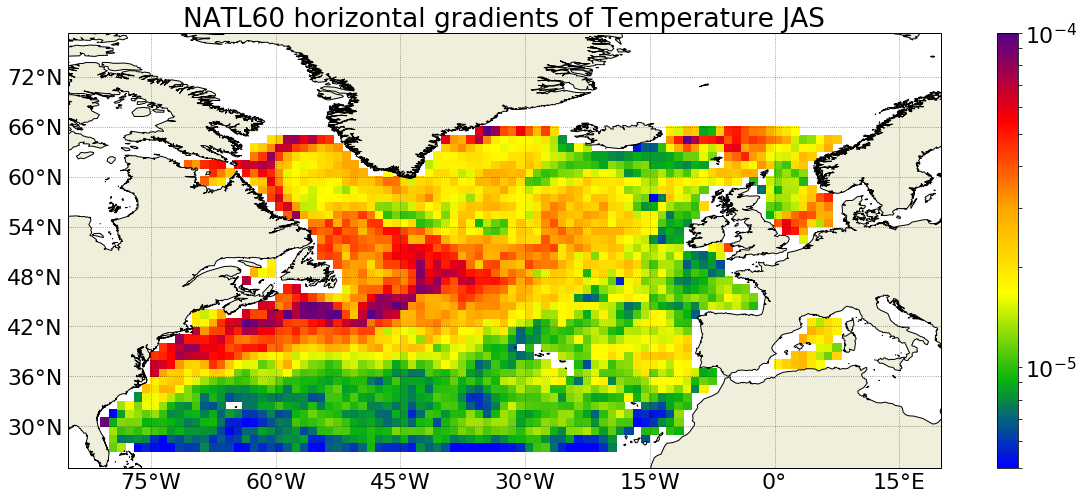

In [73]:
data=ma.masked_invalid(ds_hgradT_JAS['vohgradb'])
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-6, vmax=1e-4)

plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
plt.colorbar()
plt.title('NATL60 horizontal gradients of Temperature JAS')
plt.savefig('NATL60_TSG_T_gradients_JAS_1x1_log.png', dpi=300, bbox_inches='tight')

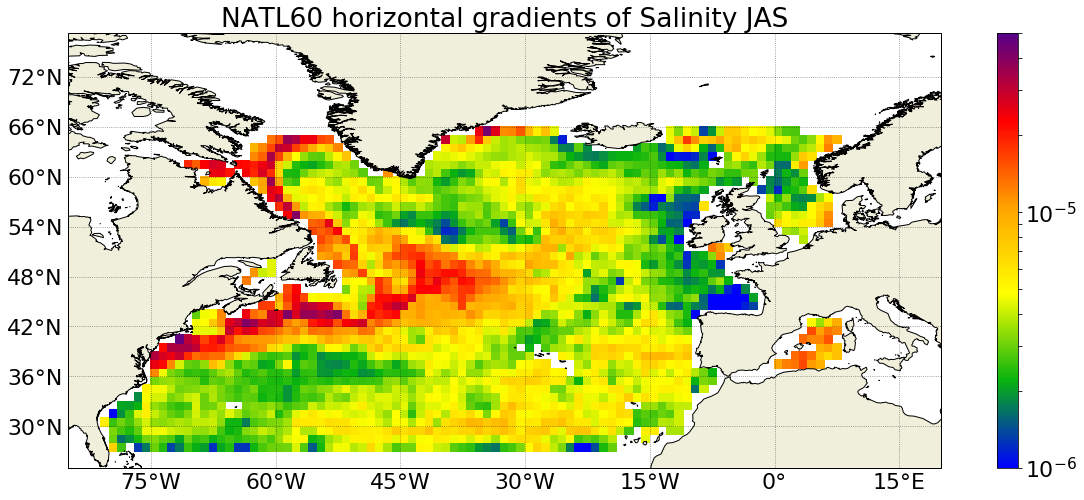

In [74]:
data=ma.masked_invalid(ds_hgradS_JAS['vohgradb'])
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=1e-6, vmax=5e-5)

plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
plt.colorbar()
plt.title('NATL60 horizontal gradients of Salinity JAS')
plt.savefig('NATL60_TSG_S_gradients_JAS_1x1_log.png', dpi=300, bbox_inches='tight')

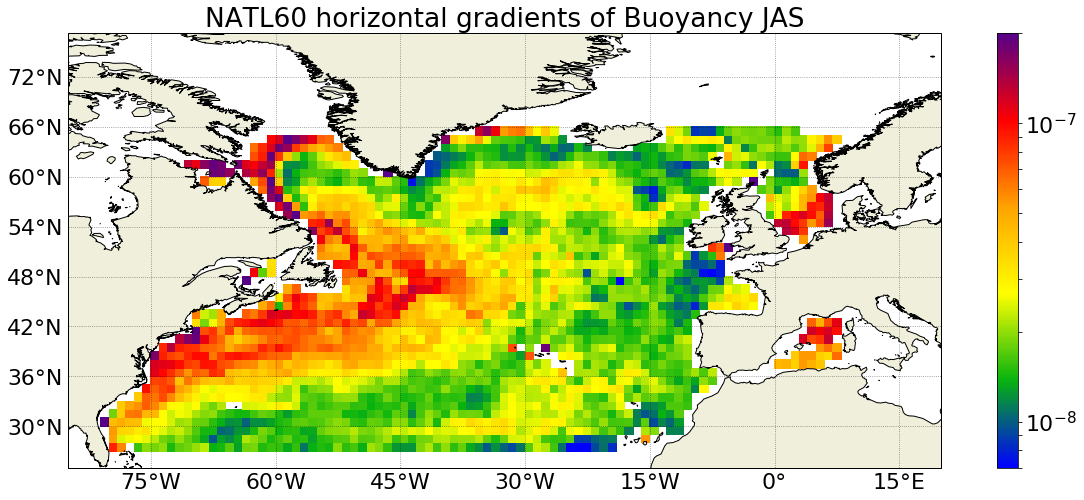

In [75]:
data=ma.masked_invalid(ds_hgradb_JAS['vohgradb'])
add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=7e-9, vmax=2e-7)

plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
plt.colorbar()
plt.title('NATL60 horizontal gradients of Buoyancy JAS')
plt.savefig('NATL60_TSG_buoy_gradients_JAS_1x1_log.png', dpi=300, bbox_inches='tight')